In [1]:
##Load the python packages
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from spotpy.objectivefunctions import kge

In [2]:
df = pd.read_csv('New_Variables.csv')
df.head()

,Unnamed: 0,Date,Precipitation,Precipitation_(-1d),Precipitation_(-7d),Volumetric Soil moisture,2m_Temp,surface_runoff,snowmelt,snow_albedo,...,P_evaporation,2m_temperature,lai_hv,lai_lv,volumetric_soil_water_layer_1,volumetric_soil_water_layer_2,Sat_Area,Discharge,Evaporation,Real time storage
0,0,1/14/1990,0.0,0.000,0.000,0.005457,8.307883,0.000000,2.070000e-07,0.854328,...,0.0,287.703251,2.341185,0.514931,0.012860,0.056208,83.057795,622.0,232.819472,1692000
1,1,4/4/1990,0.0,0.000,0.000,0.056118,14.296631,0.000000,0.000000e+00,0.879998,...,0.0,290.727425,2.344631,0.532530,0.061051,0.073915,81.264840,385.0,280.031540,1639600
2,2,4/11/1990,0.0,0.000,0.000,0.022323,17.140956,0.000000,0.000000e+00,0.880004,...,0.0,296.195757,2.345128,0.534078,0.039254,0.077635,80.886614,36.0,661.206166,1626800
3,3,4/20/1990,0.0,0.000,0.000,0.113441,13.940720,0.000006,0.000000e+00,0.880004,...,0.0,291.322648,2.345377,0.535316,0.116727,0.085404,80.579682,0.0,536.174092,1613600
4,4,5/6/1990,0.0,0.319,1.164,0.114180,14.372926,0.000000,2.170000e-19,0.879999,...,0.0,291.243463,2.345296,0.536659,0.118194,0.108626,80.213382,523.0,563.486792,1586200


In [3]:
#check if there is nan
df.isna().sum()

Unnamed: 0                       0
Date                             0
Precipitation                    0
Precipitation_(-1d)              0
Precipitation_(-7d)              0
Volumetric Soil moisture         0
2m_Temp                          0
surface_runoff                   0
snowmelt                         0
snow_albedo                      0
snow_depth                       0
P_evaporation                    0
2m_temperature                   0
lai_hv                           0
lai_lv                           0
volumetric_soil_water_layer_1    0
volumetric_soil_water_layer_2    0
Sat_Area                         0
Discharge                        0
Evaporation                      0
Real time storage                0
dtype: int64

In [4]:
#separate independent and dependent variable
predictor_data = df.iloc[:,2:-3]
predictor_data.head()

,Precipitation,Precipitation_(-1d),Precipitation_(-7d),Volumetric Soil moisture,2m_Temp,surface_runoff,snowmelt,snow_albedo,snow_depth,P_evaporation,2m_temperature,lai_hv,lai_lv,volumetric_soil_water_layer_1,volumetric_soil_water_layer_2,Sat_Area
0,0.0,0.000,0.000,0.005457,8.307883,0.000000,2.070000e-07,0.854328,0.0,0.0,287.703251,2.341185,0.514931,0.012860,0.056208,83.057795
1,0.0,0.000,0.000,0.056118,14.296631,0.000000,0.000000e+00,0.879998,0.0,0.0,290.727425,2.344631,0.532530,0.061051,0.073915,81.264840
2,0.0,0.000,0.000,0.022323,17.140956,0.000000,0.000000e+00,0.880004,0.0,0.0,296.195757,2.345128,0.534078,0.039254,0.077635,80.886614
3,0.0,0.000,0.000,0.113441,13.940720,0.000006,0.000000e+00,0.880004,0.0,0.0,291.322648,2.345377,0.535316,0.116727,0.085404,80.579682
4,0.0,0.319,1.164,0.114180,14.372926,0.000000,2.170000e-19,0.879999,0.0,0.0,291.243463,2.345296,0.536659,0.118194,0.108626,80.213382


In [5]:
# Selecting the target variable
observed_data = df.iloc[:,20:21]
observed_data.head()
 

,Real time storage
0,1692000
1,1639600
2,1626800
3,1613600
4,1586200


In [6]:
# change the variable name to X and y
X = predictor_data
y = observed_data

#X.head()
#print(y.shape)


In [7]:
# Check the shape of the data frame
print(y.shape)
print(X.shape)

(582, 1)
(582, 16)


In [8]:
# Determine the split indices for 60% training, 20% validation, and 20% test
train_split_index = int(len(X) * 0.6)
val_split_index = int(len(X) * 0.8)

In [9]:
# Split the data into training, validation, and test sets
X_train = X.iloc[:train_split_index]
X_val = X.iloc[train_split_index:val_split_index]
X_test = X.iloc[val_split_index:]

y_train = y.iloc[:train_split_index]
y_val = y.iloc[train_split_index:val_split_index]
y_test = y.iloc[val_split_index:]

# Check the splits
print("Training set size (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set size (X_val, y_val):", X_val.shape, y_val.shape)
print("Test set size (X_test, y_test):", X_test.shape, y_test.shape)

Training set size (X_train, y_train): (349, 16) (349, 1)
Validation set size (X_val, y_val): (116, 16) (116, 1)
Test set size (X_test, y_test): (117, 16) (117, 1)


In [10]:
y_train = y_train.values.ravel()
print(y_train)

[1692000 1639600 1626800 1613600 1586200 1578100 1455300 1321700 1296800
 1272800 1251900 1260900 1271100 1272600 1274300 1415400 1409600 1403600
 1416700 1442700 1450800 1499600 1520600 1527800 1511100 1550600 1563900
 1556500 1573400 1564500 1551500 1551500 1578100 1770100 1916900 2016100
 1992300 1965600 1870800 1852400 1821800 1805700 1785900 1774400 1776400
 1775000 1802100 1925900 1914500 1911300 1882400 1882000 1919000 1962800
 2003700 2012400 1945900 1880000 1817400 1802400 1768200 1767500 1770100
 1771800 1776000 1783600 1834200 1892300 1932900 1945200 1967400 1987600
 2006300 1996900 2003700 2011600 2011300 2014200 2009800 2014200 2018100
 2003400 1993400 1981600 1983700 1986600 1994100 1986600 1980500 1974500
 1979800 2022500 2038400 2038400 2040200 2037700 2027900 2012400 2000900
 1979500 1958900 1955000 1961700 1985100 2016300 2014200 2013800 2011300
 2014200 2029300 2021400 1999800 1980500 1981200 1961400 1955700 1943100
 1967700 2035480 2035100 2019900 2013100 1988400 19

In [11]:
y_val = y_val.values.ravel()
print(y_val.shape)

(116,)


In [12]:
y_test = y_test.values.ravel()
print(y_test.shape)

(117,)


In [13]:
# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf.predict(X_val)

# Predict on the test set
y_test_pred = rf.predict(X_test)

In [14]:
# Calculate evaluation metrics for validation set
# Calculate the range of the actual values
range_y_val = observed_data.max() - observed_data.min()
val_rmse = mean_squared_error(y_val, y_val_pred, squared=True)**0.5/range_y_val # Manually calculate the root mean squared error
val_mae = mean_absolute_error(y_val, y_val_pred)/range_y_val
val_kge = kge(y_val, y_val_pred)

In [15]:
# Calculate evaluation metrics for test set
test_rmse = mean_squared_error(y_test, y_test_pred, squared=True)**0.5/range_y_val  # Manually calculate the root mean squared error
test_mae = mean_absolute_error(y_test, y_test_pred)
test_kge = kge(y_test, y_test_pred)

# Print the evaluation metrics for validation set
print(f'Validation RMSE: {val_rmse}')
print(f'Validation MAE: {val_mae}')
print(f'Validation KGE: {val_kge}')

# Print the evaluation metrics for test set
print(f'Test RMSE: {test_rmse}')
print(f'Test MAE: {test_mae}')
print(f'Test KGE: {test_kge}')

Validation RMSE: Real time storage    0.017419
dtype: float64
Validation MAE: Real time storage    0.015086
dtype: float64
Validation KGE: 0.8944290037623971
Test RMSE: Real time storage    0.016422
dtype: float64
Test MAE: 27529.180341880347
Test KGE: 0.8562179994883373


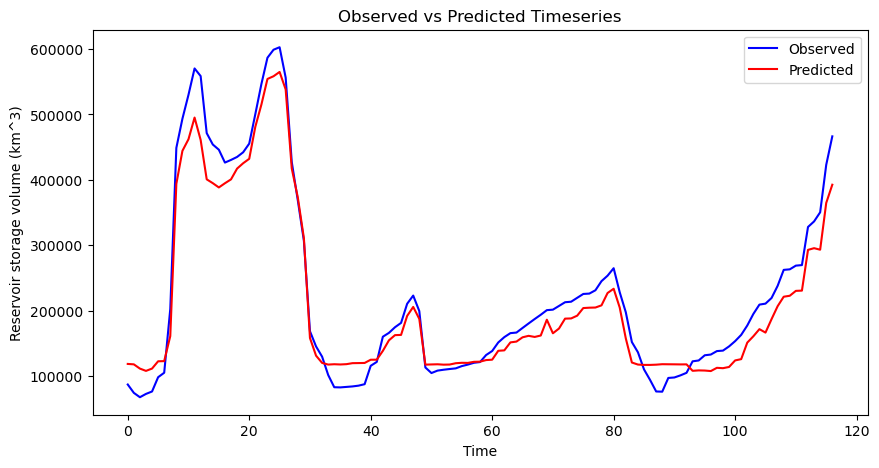

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Observed', color='blue')
plt.plot(y_test_pred, label='Predicted', color='red')
plt.title('Observed vs Predicted Timeseries')
plt.xlabel('Time')
plt.ylabel('Reservoir storage volume (km^3)')
plt.legend()
plt.savefig('observed_vs_predicted_timeseries_only_RS_data.png', dpi=300, bbox_inches='tight')
plt.show()

                          Feature  Importance
15                       Sat_Area    0.997761
4                         2m_Temp    0.000383
10                 2m_temperature    0.000366
7                     snow_albedo    0.000343
3        Volumetric Soil moisture    0.000225
14  volumetric_soil_water_layer_2    0.000224
12                         lai_lv    0.000173
13  volumetric_soil_water_layer_1    0.000163
11                         lai_hv    0.000147
8                      snow_depth    0.000115
6                        snowmelt    0.000028
0                   Precipitation    0.000020
5                  surface_runoff    0.000020
2             Precipitation_(-7d)    0.000016
1             Precipitation_(-1d)    0.000015
9                   P_evaporation    0.000000


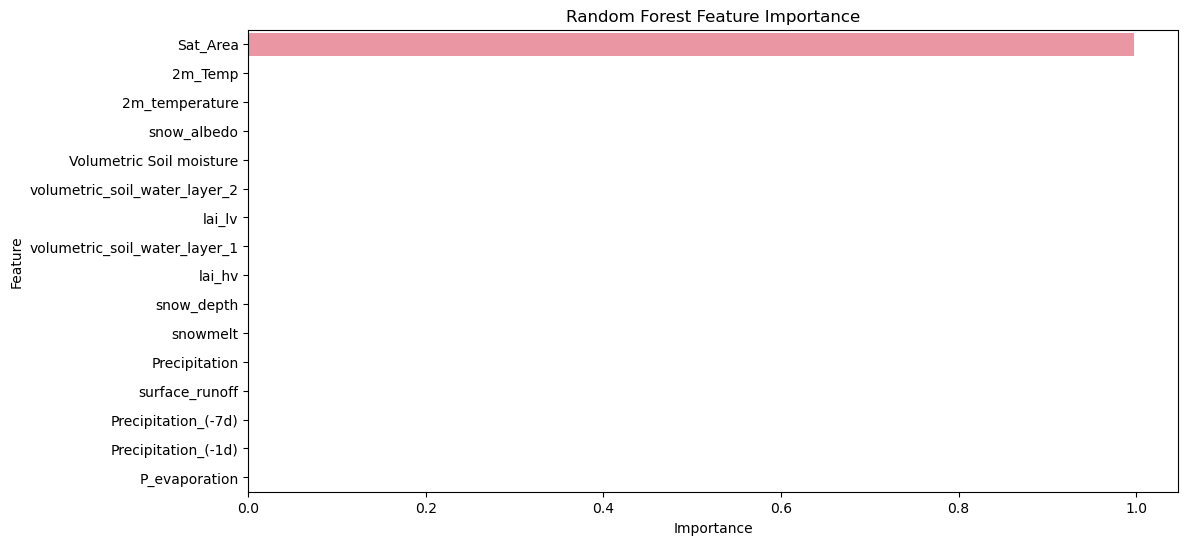

In [17]:
# Import necessary libraries for feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate feature importances from the trained Random Forest model
feature_importances = rf.feature_importances_

# Create a DataFrame to visualize the feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig('Feature_importance_Only_RS_data_with_SArea.png', dpi=300, bbox_inches='tight')
plt.show()

                          Feature  Importance
4                         2m_Temp    0.000383
10                 2m_temperature    0.000366
7                     snow_albedo    0.000343
3        Volumetric Soil moisture    0.000225
14  volumetric_soil_water_layer_2    0.000224
12                         lai_lv    0.000173
13  volumetric_soil_water_layer_1    0.000163
11                         lai_hv    0.000147
8                      snow_depth    0.000115
6                        snowmelt    0.000028
0                   Precipitation    0.000020
5                  surface_runoff    0.000020
2             Precipitation_(-7d)    0.000016
1             Precipitation_(-1d)    0.000015
9                   P_evaporation    0.000000


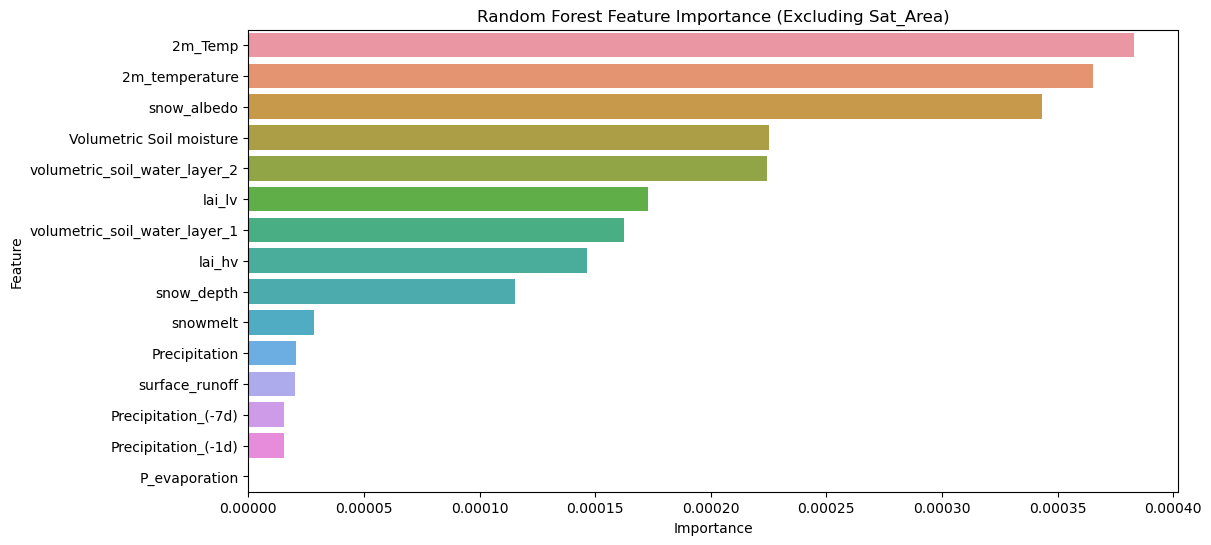

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'feature_importance_df' is already defined
# Filter out 'Sat_Area' from the feature importance DataFrame
filtered_feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'Sat_Area']

# Display the filtered feature importances
print(filtered_feature_importance_df)

# Plot the filtered feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=filtered_feature_importance_df)
plt.title('Random Forest Feature Importance (Excluding Sat_Area)')
plt.xlabel('Importance')
plt.savefig('Feature_importance_Only_RS_data_without_SArea.png', dpi=300, bbox_inches='tight')
plt.show()
